In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
import os

In [3]:
os.getcwd()

'C:\\Users\\hp'

In [4]:
df = pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\global power plant.csv')

In [5]:
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


# EDA

In [6]:
df.shape

(908, 25)

In [7]:
df['capacity_mw'].unique()

array([2.50000e+00, 9.80000e+01, 3.92000e+01, 1.35000e+02, 1.80000e+03,
       2.50000e+02, 6.00000e+01, 1.92000e+02, 2.90000e+02, 2.10000e+02,
       1.35000e+03, 1.34000e+02, 1.20000e+03, 1.69500e+01, 9.00000e+00,
       2.63000e+03, 4.19330e+02, 6.00000e+02, 1.00000e+01, 1.70000e+01,
       2.40000e+01, 6.52000e+02, 4.60000e+01, 5.00000e+01, 1.00000e+00,
       1.65000e+01, 1.13600e+02, 1.98000e+01, 1.32000e+01, 5.00000e+00,
       2.00000e+02, 7.05000e+02, 2.80000e+01, 4.50000e+02, 1.80000e+02,
       1.05000e+03, 5.10000e+02, 6.75000e+01, 3.00000e+02, 4.55000e+02,
       1.20000e+01, 3.15000e+02, 3.00000e+01, 2.00000e+01, 4.20000e+01,
       7.20000e+02, 9.00000e+01, 1.32000e+03, 1.20000e+02, 6.40000e+01,
       2.70000e+02, 2.28000e+01, 1.50000e+01, 2.52000e+01, 1.80000e+01,
       1.70000e+03, 4.10000e+01, 1.32500e+03, 3.40000e+01, 1.60000e+01,
       5.00000e+02, 8.00000e+01, 7.50000e+01, 1.21000e+03, 9.90000e+01,
       6.96000e+01, 6.00000e+00, 4.00000e+01, 1.65000e+02, 7.500

In [8]:
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [9]:
#regression problem

In [10]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

In [11]:
catg=df.select_dtypes('object')
cont=df.select_dtypes('number')

In [12]:
catg.head()

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,source,url,geolocation_source,generation_data_source
0,IND,India,ACME Solar Tower,WRI1020239,Solar,NaN,NaN,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,Coal,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,Wind,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN
3,IND,India,AGARTALA GT,IND0000001,Gas,NaN,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority
4,IND,India,AKALTARA TPP,IND0000002,Coal,Oil,NaN,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,Central Electricity Authority


In [13]:
cont.head()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
0,2.5,28.1839,73.2407,NaN,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,NaN,2004.0,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,NaN
4,1800.0,21.9603,82.4091,NaN,2015.0,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,NaN


In [14]:
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [15]:
df['latitude'].fillna(df['latitude'].mean(),inplace=True)

In [16]:
df['longitude'].fillna(df['longitude'].mean(),inplace=True)

In [17]:
df['other_fuel1'].fillna(df['other_fuel1'].mode()[0],inplace=True)

In [18]:
df['other_fuel2'].fillna(df['other_fuel2'].mode()[0],inplace=True)

In [19]:
df['other_fuel3'].fillna(df['other_fuel3'].mean(),inplace=True)

In [20]:
df['commissioning_year'].fillna(df['commissioning_year'].median(),inplace=True)

In [21]:
df['owner'].fillna(df['owner'].mode()[0],inplace=True)

In [22]:
df['geolocation_source'].fillna(df['geolocation_source'].mode()[0],inplace=True)

In [23]:
df['wepp_id'].fillna(df['wepp_id'].mean(),inplace=True)

In [24]:
df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].median(),inplace=True)

In [25]:
df['generation_gwh_2013'].fillna(df['generation_gwh_2013'].median(),inplace=True)

In [26]:
df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median(),inplace=True)

In [27]:
df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median(),inplace=True)

In [28]:
df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median(),inplace=True)

In [29]:
df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median(),inplace=True)

In [30]:
df['generation_data_source'].fillna(df['generation_data_source'].mode()[0],inplace=True)

In [31]:
df['estimated_generation_gwh'].fillna(df['estimated_generation_gwh'].mean(),inplace=True)

In [32]:
df.drop(columns=['other_fuel3','wepp_id','estimated_generation_gwh'],inplace=True)

In [33]:
df.shape

(908, 22)

In [34]:
df.isnull().sum()

country                   0
country_long              0
name                      0
gppd_idnr                 0
capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
other_fuel1               0
other_fuel2               0
commissioning_year        0
owner                     0
source                    0
url                       0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2013       0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_data_source    0
dtype: int64

In [35]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [36]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [37]:
df.dtypes

country                   float64
country_long              float64
name                      float64
gppd_idnr                 float64
capacity_mw               float64
latitude                  float64
longitude                 float64
primary_fuel              float64
other_fuel1               float64
other_fuel2               float64
commissioning_year        float64
owner                     float64
source                    float64
url                       float64
geolocation_source        float64
year_of_capacity_data     float64
generation_gwh_2013       float64
generation_gwh_2014       float64
generation_gwh_2015       float64
generation_gwh_2016       float64
generation_gwh_2017       float64
generation_data_source    float64
dtype: object

In [38]:
#convert numerical proceed data set

In [39]:
df.describe()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
count,908.0,908.0,908.00000,908.00000,908.000000,908.000000,908.000000,908.000000,908.000000,908.0,...,908.000000,908.000000,908.000000,908.0,908.000000,908.000000,908.000000,908.000000,908.000000,908.0
mean,0.0,0.0,453.50000,453.50000,321.046378,21.196189,77.447848,3.205947,1.995595,0.0,...,43.823789,94.429515,1.733480,2018.0,1434.383254,1518.830440,1502.838018,1552.807503,1648.790766,0.0
std,0.0,0.0,262.26132,262.26132,580.221767,6.088110,4.781201,2.281339,0.081214,0.0,...,44.624092,70.352824,0.676835,0.0,2575.982982,2783.474774,2985.277178,3006.880849,3047.577626,0.0
min,0.0,0.0,0.00000,0.00000,0.000000,8.168900,68.644700,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.0,0.0,226.75000,226.75000,16.837500,17.057825,74.390250,1.000000,2.000000,0.0,...,22.000000,58.000000,2.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,0.0
50%,0.0,0.0,453.50000,453.50000,60.000000,21.278850,76.978950,3.000000,2.000000,0.0,...,22.000000,58.000000,2.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,0.0
75%,0.0,0.0,680.25000,680.25000,388.125000,25.183775,79.211600,6.000000,2.000000,0.0,...,29.250000,115.250000,2.000000,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,0.0
max,0.0,0.0,907.00000,907.00000,4760.000000,34.649000,95.408000,7.000000,2.000000,0.0,...,190.000000,303.000000,2.000000,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,0.0


In [40]:
#data vislization

<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

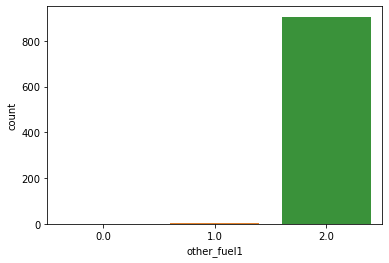

In [41]:
sns.countplot(df['other_fuel1'])

<AxesSubplot:xlabel='other_fuel2', ylabel='count'>

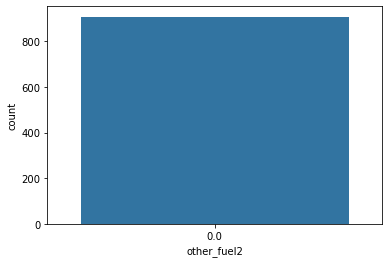

In [42]:
sns.countplot(df['other_fuel2'])

<AxesSubplot:xlabel='country', ylabel='count'>

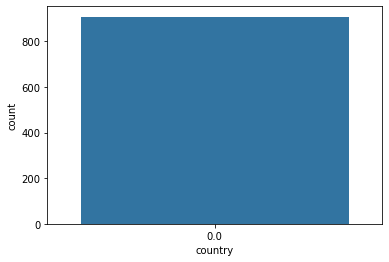

In [43]:
sns.countplot(df['country'])

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

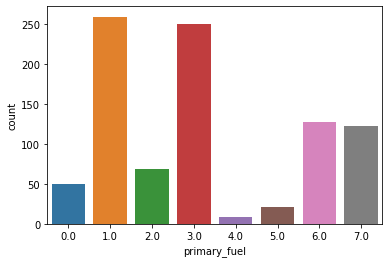

In [44]:
sns.countplot(df['primary_fuel'])

<AxesSubplot:xlabel='name', ylabel='count'>

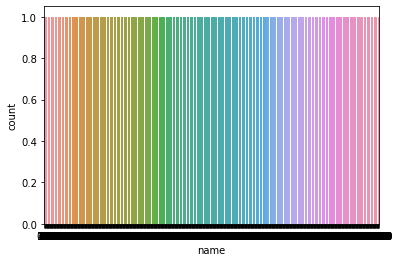

In [45]:
sns.countplot(df['name'])

<AxesSubplot:xlabel='capacity_mw', ylabel='count'>

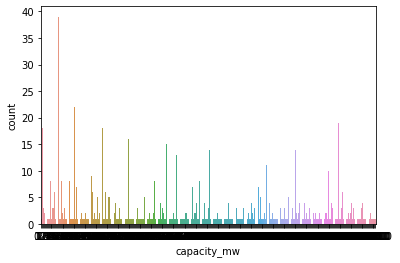

In [46]:
sns.countplot(df['capacity_mw'])

<AxesSubplot:xlabel='owner', ylabel='source'>

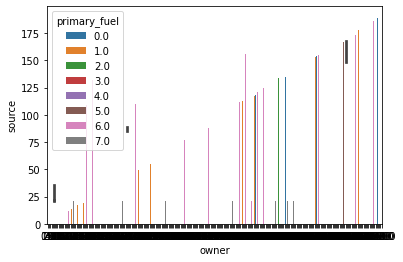

In [47]:
sns.barplot(data=df,x='owner',y='source',hue='primary_fuel')

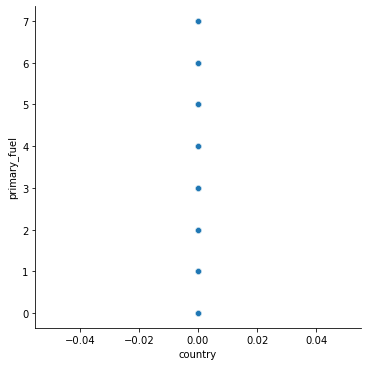

In [48]:
sns.relplot(data=df,x='country',y='primary_fuel')

<AxesSubplot:xlabel='name', ylabel='primary_fuel'>

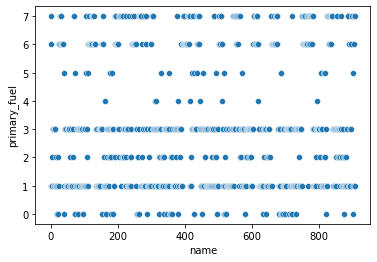

In [49]:
sns.scatterplot(data=df,x='name',y='primary_fuel')

<AxesSubplot:xlabel='generation_gwh_2013', ylabel='generation_gwh_2014'>

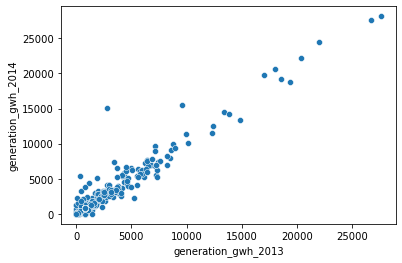

In [50]:
sns.scatterplot(data=df,x='generation_gwh_2013',y='generation_gwh_2014')

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='generation_gwh_2016'>

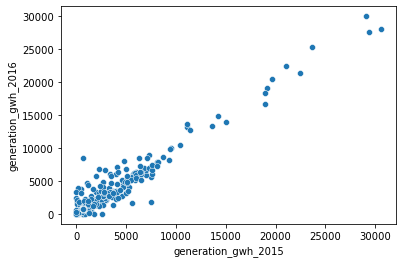

In [51]:
sns.scatterplot(data=df,x='generation_gwh_2015',y='generation_gwh_2016')

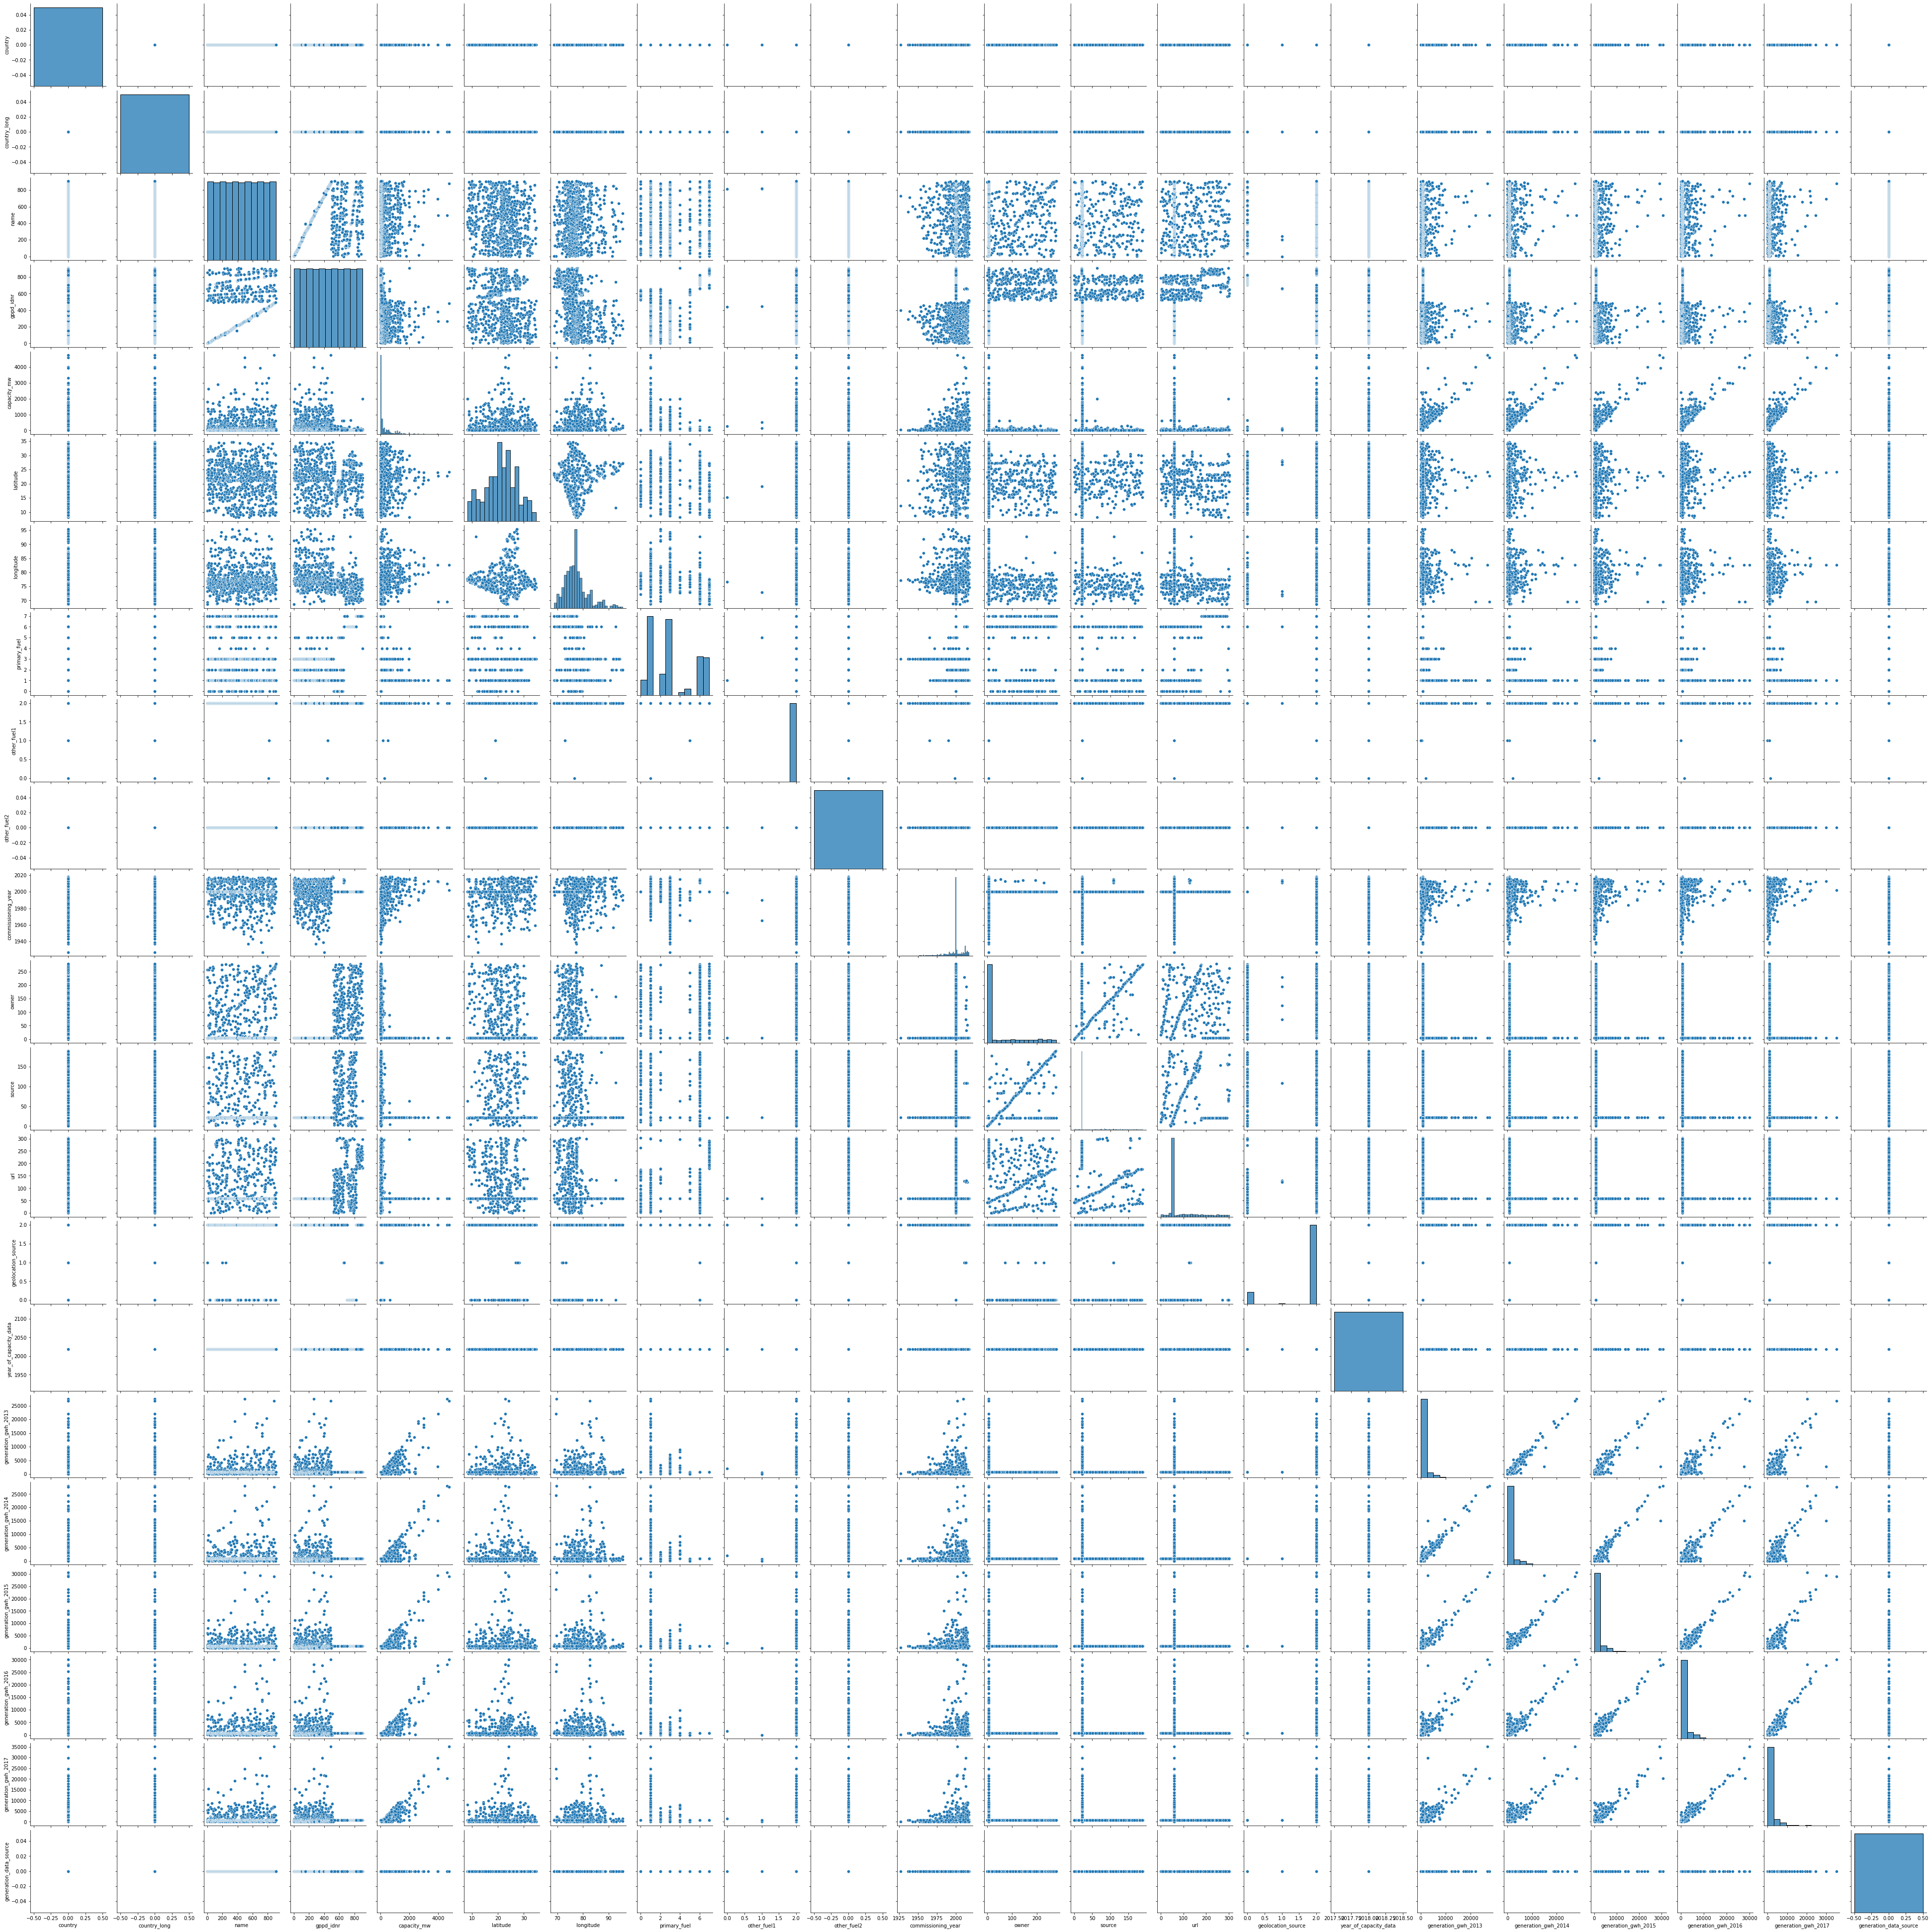

In [52]:
sns.pairplot(df)

In [53]:
corr_mat = df.corr()
corr_mat

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source
country,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_long,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
name,NaN,NaN,1.000000,0.336792,0.059870,-0.133707,0.018649,0.038752,-0.074643,NaN,...,-0.013801,0.042711,0.035528,NaN,0.079328,0.082761,0.071895,0.065368,0.069395,NaN
gppd_idnr,NaN,NaN,0.336792,1.000000,-0.334308,-0.105932,-0.380290,0.607373,0.001812,NaN,...,0.416575,0.596994,-0.464119,NaN,-0.155146,-0.160279,-0.176156,-0.187756,-0.183912,NaN
capacity_mw,NaN,NaN,0.059870,-0.334308,1.000000,0.049790,0.197124,-0.377783,0.002672,NaN,...,-0.241701,-0.243176,0.204698,NaN,0.756523,0.804581,0.830400,0.863989,0.877058,NaN
latitude,NaN,NaN,-0.133707,-0.105932,0.049790,1.000000,0.031501,-0.013453,0.036606,NaN,...,0.055943,-0.130619,-0.183999,NaN,0.054483,0.058936,0.054242,0.048095,0.057915,NaN
longitude,NaN,NaN,0.018649,-0.380290,0.197124,0.031501,1.000000,-0.348710,0.030297,NaN,...,-0.239008,-0.303054,0.252415,NaN,0.100518,0.105803,0.123509,0.146255,0.153995,NaN
primary_fuel,NaN,NaN,0.038752,0.607373,-0.377783,-0.013453,-0.348710,1.000000,0.004902,NaN,...,0.053609,0.589348,-0.482803,NaN,-0.228761,-0.240407,-0.249826,-0.260900,-0.263818,NaN
other_fuel1,NaN,NaN,-0.074643,0.001812,0.002672,0.036606,0.030297,0.004902,1.000000,NaN,...,0.026557,0.028118,-0.021383,NaN,0.006463,0.005641,0.008813,0.013677,0.011966,NaN
other_fuel2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
corr_mat = df.corr()
corr_mat['primary_fuel'].sort_values(ascending=False)

primary_fuel              1.000000
gppd_idnr                 0.607373
url                       0.589348
owner                     0.284055
source                    0.053609
name                      0.038752
other_fuel1               0.004902
latitude                 -0.013453
commissioning_year       -0.065716
generation_gwh_2013      -0.228761
generation_gwh_2014      -0.240407
generation_gwh_2015      -0.249826
generation_gwh_2016      -0.260900
generation_gwh_2017      -0.263818
longitude                -0.348710
capacity_mw              -0.377783
geolocation_source       -0.482803
country                        NaN
country_long                   NaN
other_fuel2                    NaN
year_of_capacity_data          NaN
generation_data_source         NaN
Name: primary_fuel, dtype: float64

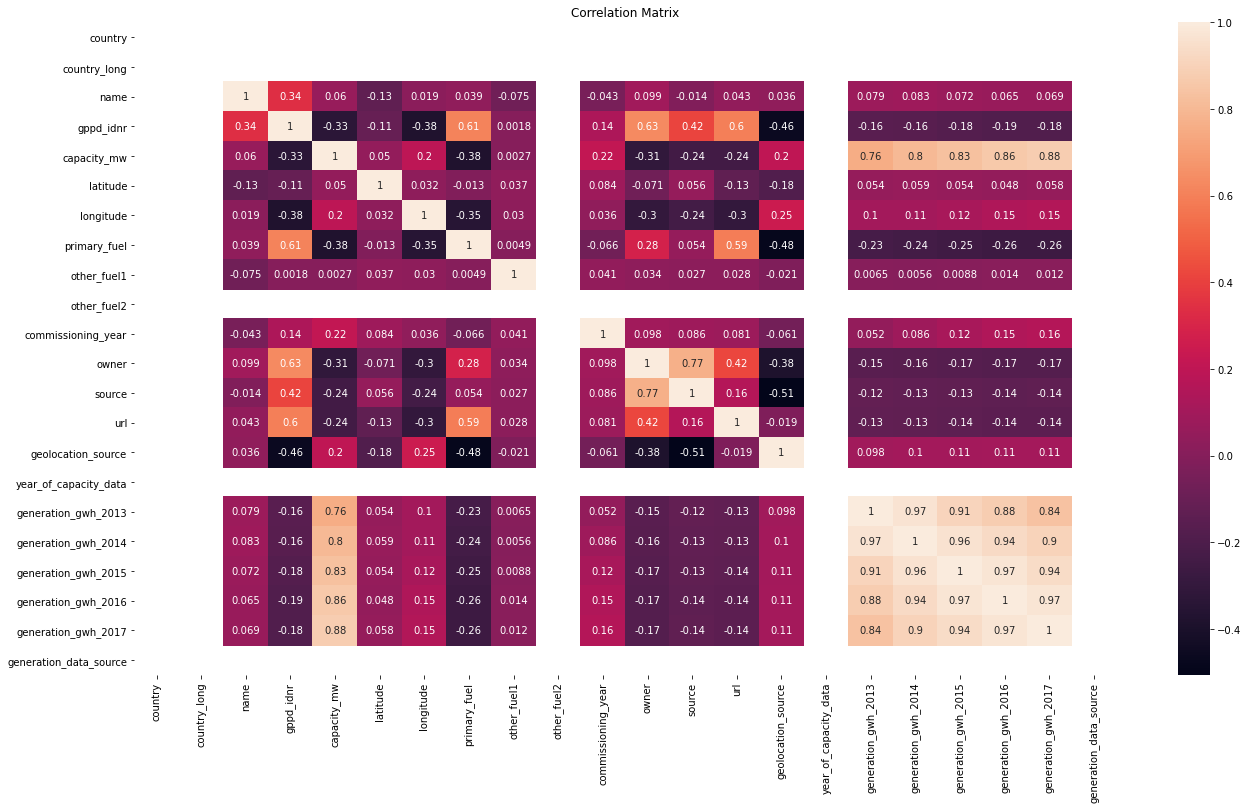

In [55]:
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

In [56]:
#complete visulazation part

In [57]:
#boxplot

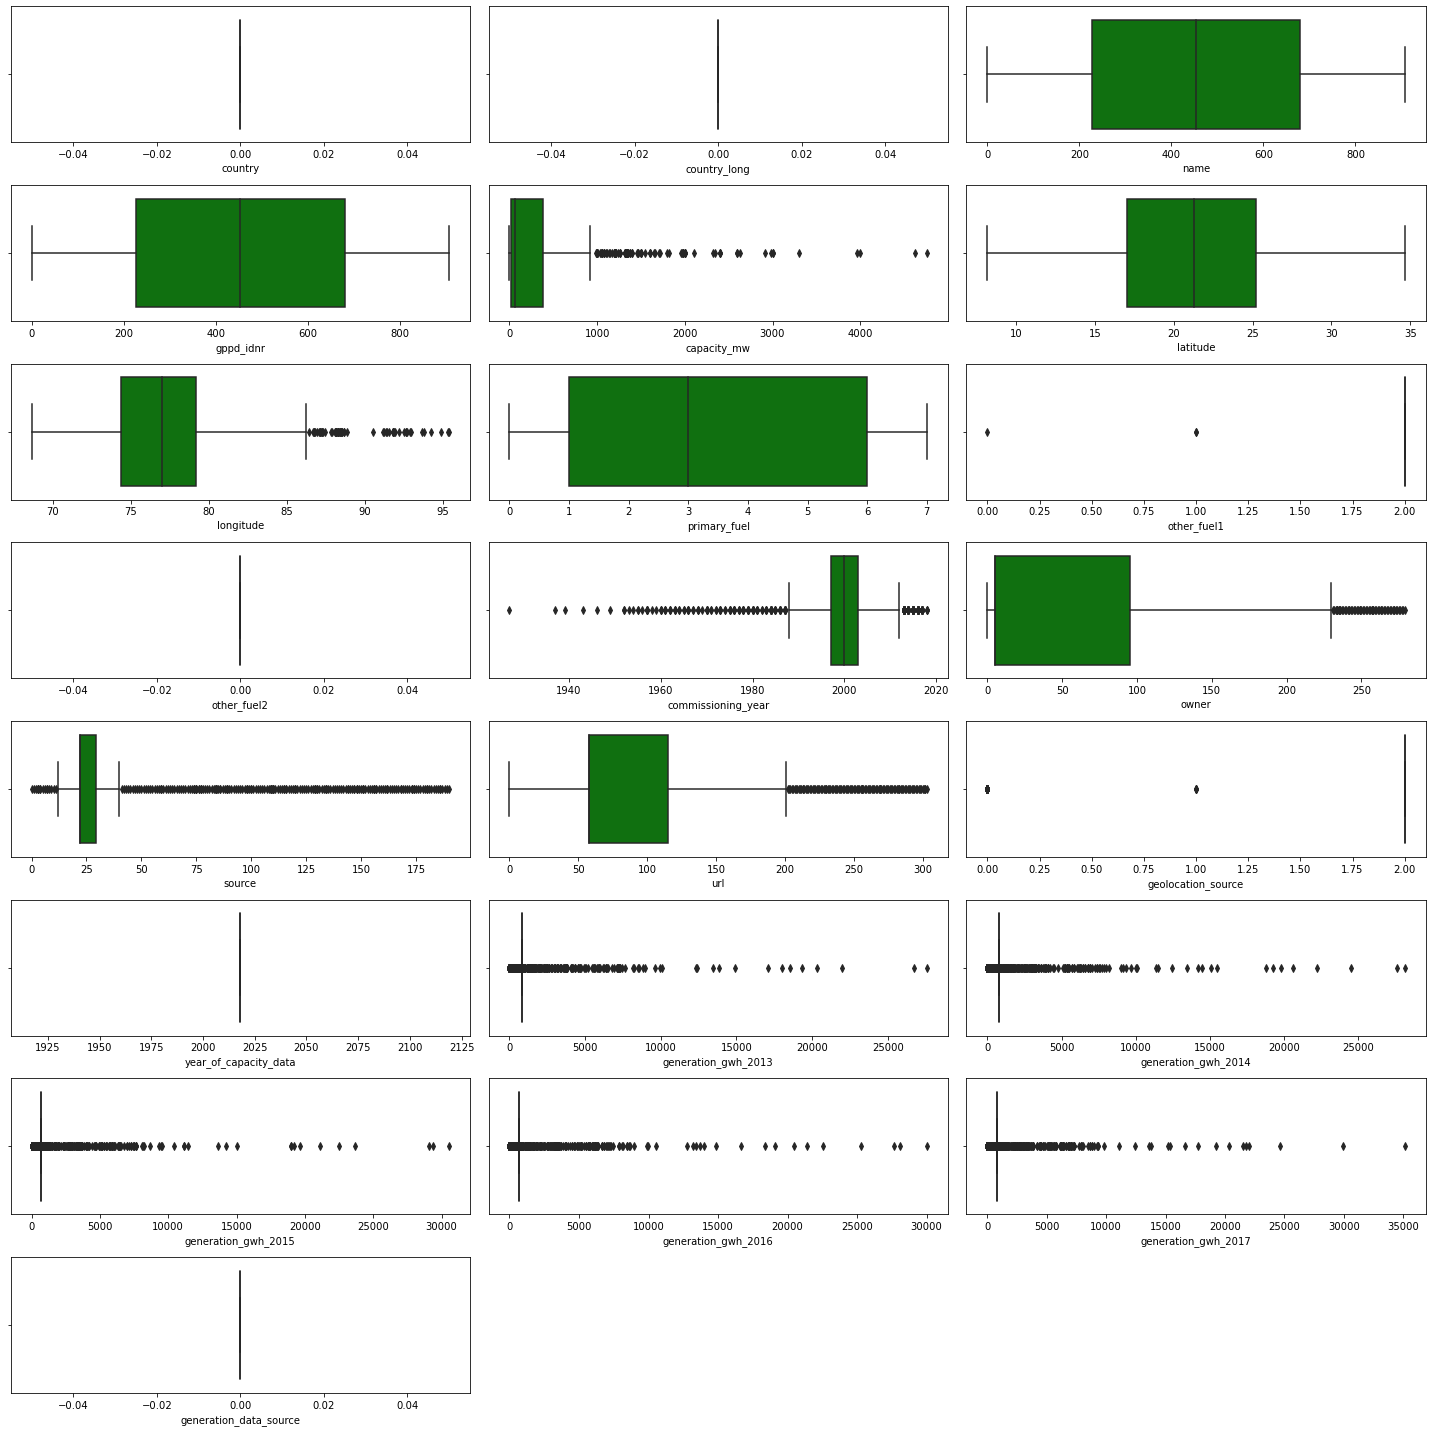

In [58]:
collist=df.columns.values
ncol=3
nrows=8
plt.figure(figsize=(20,20))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green')
    plt.tight_layout()

In [59]:
dfCountCols = df[['longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

In [60]:
from scipy.stats import zscore
z = np.abs(zscore(dfCountCols))
df_new=df[(z<3).all(axis=1)]

In [61]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new.shape[0])/df.shape[0])


shape before and after
shape before         : (908, 22)
shape after          : (852, 22)
Percentage Loss      : 0.06167400881057269


In [62]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#df_new = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [63]:
dfCountCols = df[['longitude','commissioning_year','generation_gwh_2013','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017']]

In [64]:
Q1 = dfCountCols.quantile(0.25)
Q3 = dfCountCols.quantile(0.75)
IQR = Q3 - Q1
df_new1 = df[~((dfCountCols < (Q1 - 1.5 * IQR)) |(dfCountCols > (Q3 + 1.5 * IQR))).any(axis=1)]


In [65]:
print("shape before and after")
print("shape before".ljust(20),":", df.shape)
print("shape after".ljust(20),":", df_new1.shape)
print("Percentage Loss".ljust(20),":", (df.shape[0]-df_new1.shape[0])/df.shape[0])


shape before and after
shape before         : (908, 22)
shape after          : (422, 22)
Percentage Loss      : 0.5352422907488987


In [66]:
cont=df.drop(columns=['primary_fuel','capacity_mw'],axis=1)
y=df['primary_fuel']

In [67]:
cont.skew()

country                    0.000000
country_long               0.000000
name                       0.000000
gppd_idnr                  0.000000
latitude                  -0.147391
longitude                  1.129836
other_fuel1              -20.464435
other_fuel2                0.000000
commissioning_year        -1.650230
owner                      1.366078
source                     1.829145
url                        1.512258
geolocation_source        -2.161710
year_of_capacity_data      0.000000
generation_gwh_2013        5.535740
generation_gwh_2014        5.325540
generation_gwh_2015        5.565770
generation_gwh_2016        5.278233
generation_gwh_2017        5.312975
generation_data_source     0.000000
dtype: float64

In [68]:
from sklearn.preprocessing import power_transform
df_new=power_transform(cont)

In [69]:
df_new=pd.DataFrame(df_new,columns=cont.columns)

In [70]:
df_new.skew()

country                    0.000000
country_long               0.000000
name                      -0.288181
gppd_idnr                 -0.288181
latitude                  -0.074872
longitude                  0.002419
other_fuel1              -17.339637
other_fuel2                0.000000
commissioning_year        -0.426588
owner                      0.467627
source                    -0.214850
url                        0.064612
geolocation_source        -2.134586
year_of_capacity_data      0.000000
generation_gwh_2013        0.313991
generation_gwh_2014        0.286606
generation_gwh_2015        0.220431
generation_gwh_2016        0.201832
generation_gwh_2017        0.194047
generation_data_source     0.000000
dtype: float64

In [71]:
#1 st model used targer variable for primary fuel

In [72]:
x=df.drop(columns=['primary_fuel'],axis=1)
y=df['primary_fuel']

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [74]:
from sklearn.tree import DecisionTreeRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    mod = DecisionTreeRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    r2 = r2_score(y_test,pred)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.9143793828376531 on Random_state 54


In [75]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [76]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = .30,random_state=maxRS)

In [77]:
dt=DecisionTreeRegressor()

In [78]:
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(dt,x,y,cv=5).mean())

r2 score 0.9103659164081681
0.27106227106227104
0.4908424908424908
0.8470744199620572


In [79]:
x=df.drop(columns=['capacity_mw'],axis=1)
y=df['capacity_mw']

In [80]:
from sklearn.ensemble import RandomForestRegressor
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    r2 = r2_score(y_test,pred)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print('Best accuracy is',maxAccu,'on Random_state',maxRS)

Best accuracy is 0.9261761739708197 on Random_state 162


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [82]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = .30,random_state=maxRS)

In [84]:
rf=RandomForestRegressor()

In [85]:
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print('r2 score',r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(cross_val_score(rf,x,y,cv=5).mean())

r2 score 0.9227938720162787
93.51112040293042
29643.755178797022
0.8421033526097453


In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
#hyper paramater tuning best model random forest

In [88]:
param_grid = {'n_estimators':[23,5,8,28,21],
              'criterion':['mse','mae'],
              'max_depth':[33,8,38,31,4],
              'min_samples_split':[43,3,48,41,3]}

gridsearch = GridSearchCV(estimator=rf, param_grid=param_grid,cv=5)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [33, 8, 38, 31, 4],
                         'min_samples_split': [43, 3, 48, 41, 3],
                         'n_estimators': [23, 5, 8, 28, 21]})

In [89]:
gridsearch.best_params_

{'criterion': 'mae',
 'max_depth': 38,
 'min_samples_split': 3,
 'n_estimators': 23}

In [90]:
mod = RandomForestRegressor(criterion='mae',max_depth=38,min_samples_split=3,n_estimators=23)
mod.fit(x_train,y_train)
y_pred = mod.predict(x_test)
r2=r2_score(y_test,y_pred)
print(r2*100)

91.2469964603287


In [91]:
#save the model

In [92]:
import joblib
joblib.dump(mod,'global power plant.pkl')

['global power plant.pkl']